<a class="anchor" id="0.1"></a>
## Data Visualization for Messy Data
Data visualization tutorials generally use pre-processed data. But what about datasets in the wild? What do we do about missing data? Or outliers that largely skew visualizations? What do we do when there are too many observations to be interpretable in a scatterplot? This notebook will introduce some of the methods we can use to work around these problems.

- [Missing Data](#1)
- [Preliminary View](#2)
- [Plotting with Outliers](#3)
- [Visualizing Many Data Polints](#4)
- [Visualizing Discrete Variables](#5)
- [Log Transformation](#6)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Missing Data <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

Incomplete observations — or missing data — are generally ignored by plotting functions in commonly-used Python libraries, such as matplotlib and seaborn. Therefore, we may want to remove those rows or impute the missing values before plotting. We can check for missing data using ``.info()``.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10000 non-null  int64  
 1   url                      10000 non-null  object 
 2   region                   10000 non-null  object 
 3   region_url               10000 non-null  object 
 4   price                    10000 non-null  int64  
 5   type                     10000 non-null  object 
 6   sqfeet                   10000 non-null  int64  
 7   beds                     10000 non-null  int64  
 8   baths                    10000 non-null  float64
 9   cats_allowed             10000 non-null  int64  
 10  dogs_allowed             10000 non-null  int64  
 11  smoking_allowed          10000 non-null  int64  
 12  wheelchair_access        10000 non-null  int64  
 13  electric_vehicle_charge  10000 non-null  int64  
 14  comes_furnished        

**Based on this output, we may be concerned about the columns `laundry_options` and `parking_options` because they have more missing values than other columns.**

### Preliminary View <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

Let’s take a look at a first look at two variables and see what issues we run into. Here is a plot of `price` vs. `area` in square feet:

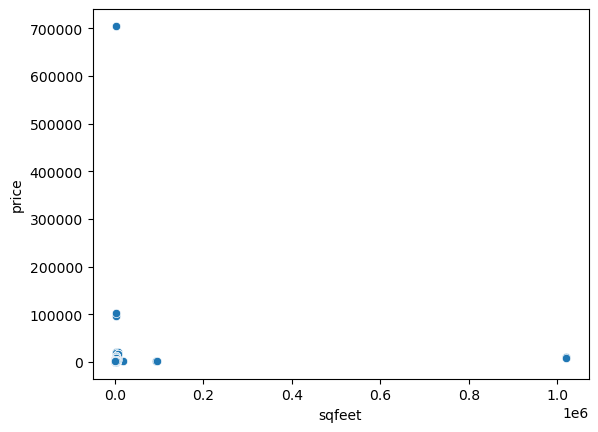

In [39]:
sns.scatterplot(data = df, x = "sqfeet", y = "price");

**It doesn’t look like there are many points on this plot, even though there should be 10,000 points. The 1e6 on the y- axes, indicate that the scale and range for feature is incredibly large. For example, we have at least one house that area almost 1,000,000 sqfeet. Dealing with these outliers is the first thing we will have to do in order to more effectively visualize the data.**

### Plotting with Outliers <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

We can whittle down each feature in the plot to cut out outliers until we have a better feel for the data. It can take some trial and error to find the right values, so let’s start by limiting `price` to less than $700,000 and `sqfeet` to less than 1,000,000:

In [40]:
df2 = df[(df["price"] < 700000) & (df["price"] > 0)]
df2 = df2[(df2["sqfeet"] < 1000000) & (df2["sqfeet"] > 0)]

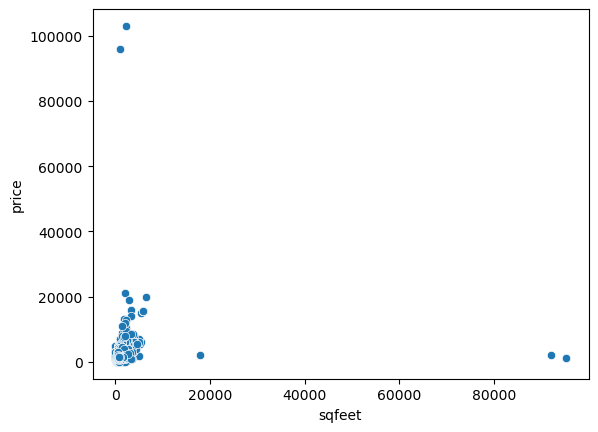

In [34]:
sns.scatterplot(data = df2, x = "sqfeet", y = "price");

**This scatterplot is a little bit better. We can see more points showing in the bottom left-hand side of the plot. Let’s get closer to that cluster of points: let’s limit both `price` and `sqfeet` to values less than 20,000:**

In [42]:
df2 = df[(df["price"] < 20000) & (df["price"] > 0)]
df2 = df2[(df2["sqfeet"] < 20000) & (df2["sqfeet"] > 0)]

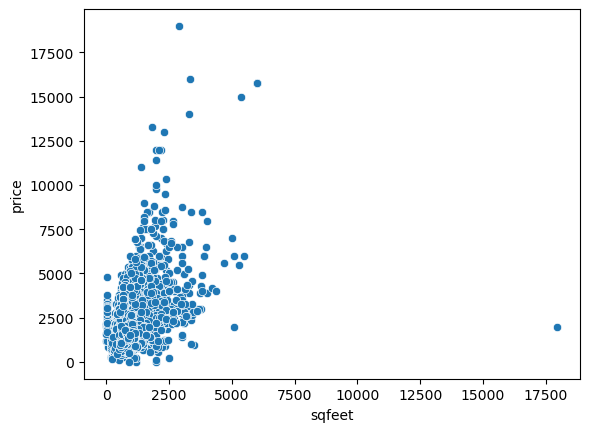

In [43]:
sns.scatterplot(data = df2, x = "sqfeet", y = "price");

**Now we are starting to see all of the points! There is still a lot of white space on the right-hand side, so let’s limit our data one more time, this time limiting both `price` and `sqfeet` to values less than 3,000:**

In [44]:
df2 = df[(df["price"] < 3000) & (df["price"] > 0)]
df2 = df2[(df2["sqfeet"] < 3000) & (df2["sqfeet"] > 0)]

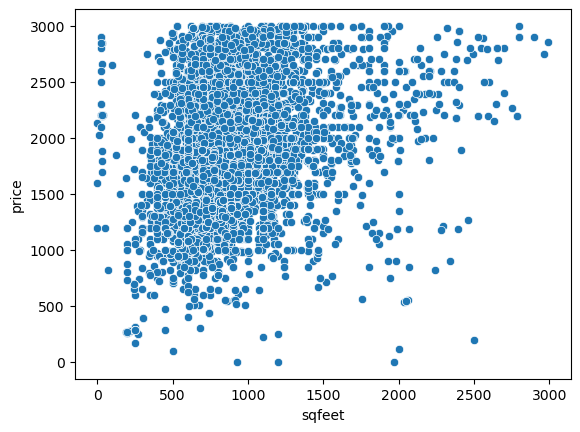

In [46]:
sns.scatterplot(data = df2, x = "sqfeet", y = "price");

**Now we can really see the bulk of the points from our dataset. However there are still so many points here that they are all printed on top of one another. This means that we cannot visualize the density of the points and therefore the overall relationship between `price` and `area`.**

### Visualizing Many Data Points <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

When there are too many data points to visualize, one thing we can do is take a random subset of the data. This will mean fewer dots and because it is a random subset, it should still be approximately generalizable to the full dataset. Let’s try using a random 5% of the data:

In [55]:
perc = 0.5
df_sub = df2.sample(n = int(df2.shape[0] * perc))
df_sub.shape

(4181, 22)

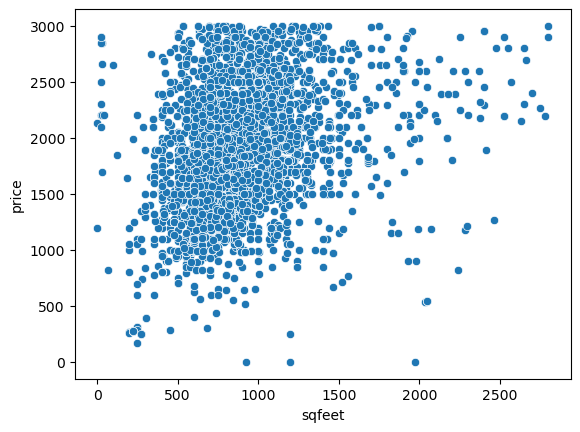

In [56]:
sns.scatterplot(data = df_sub, x = "sqfeet", y = "price");

**There’s still a lot of overlap, but we can actually see the positive linear association between `area` and `price` that was difficult to visualize originally.**

**We can still improve upon this. We can try making each point smaller to better see places of higher concentration of plotted points:**

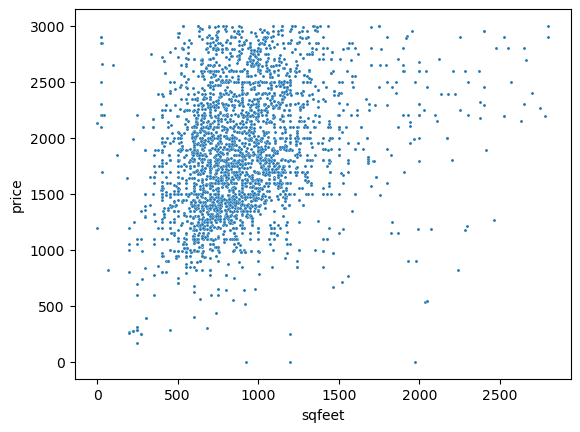

In [58]:
sns.scatterplot(data = df_sub, x = "sqfeet", y = "price", s = 5);

**This plot is better than the previous one because, at a glance, we can see the higher concentration of points in the 500 to 1500 `sqfeet` range and the 500 to 2000 `price` range.**

**However this still doesn’t give us a great understanding of just how many points are in this middle cluster.**

**Rather than plotting the points smaller, we may want to make them more see-through. This way, we can interpret color intensity to understand the overlap:**

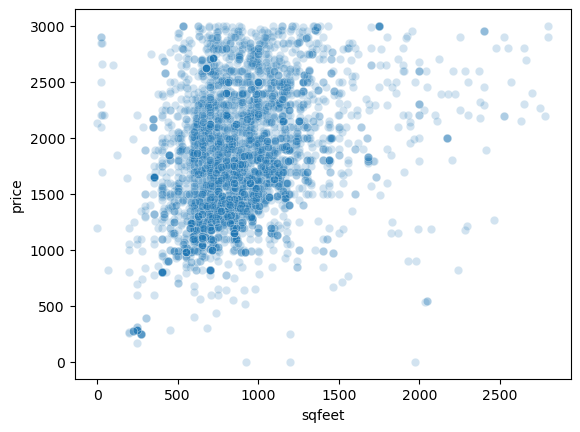

In [59]:
sns.scatterplot(data = df_sub, x = "sqfeet", y = "price", alpha = 0.2);

**We also might consider plotting a LOWESS (Locally Weighted Scatterplot Smoothing) smoother over our data points. This will draw a line through the approximate average price for each value of `sqfeet`:**

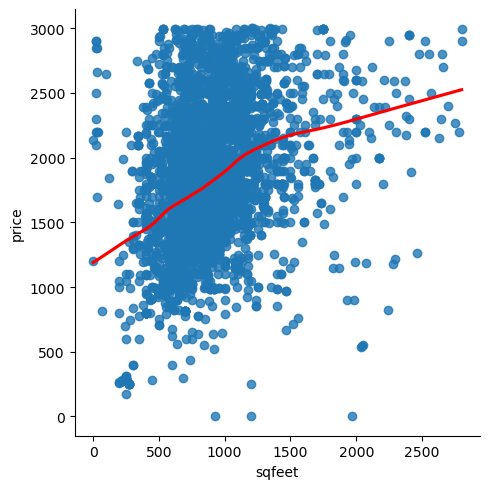

In [61]:
sns.lmplot(data = df_sub, x = "sqfeet", y = "price", line_kws = {"color" : "red"}, lowess = True);

**Though the individual points are more difficult to read, the line gives us information about the relationship between these two features.**

###  Visualizing Discrete Variables <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

Let’s say we wanted to look at the relationship between `beds` and `baths` in our data set. We can easily plot the scatterplot:

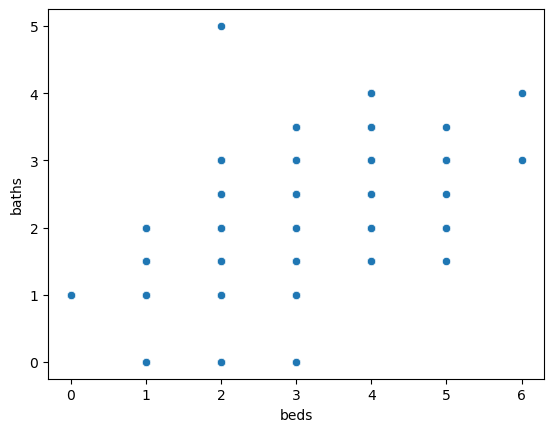

In [62]:
sns.scatterplot(data = df_sub, x = "beds", y = "baths");

**While this plot tells us each combination of number of `beds` and `bathrooms` in our data set, it doesn’t tell us how many observations there are.**

**This is because both features are discrete values, in this case meaning limited to whole numbers for `beds` and half numbers for `bath`. So every data point that represents 3 beds and 2 bathrooms is plotted at the exact same spot as the others, perfectly overlapping to look like one point.**

Adding a `jitter` adjusts the spread of points along either (or both) axes in order to more easily see some many points there are in each group:

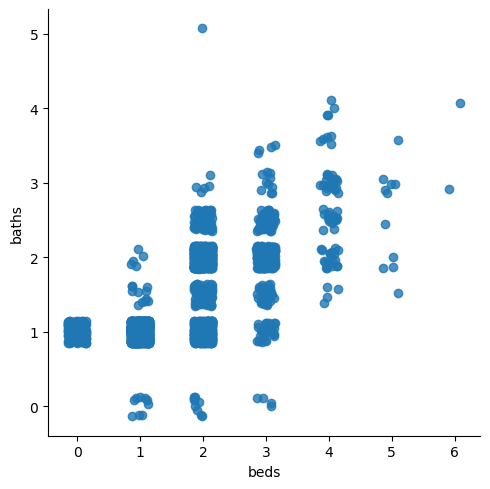

In [63]:
sns.lmplot(data = df_sub, x = "beds", y = "baths", x_jitter = 0.15, y_jitter = 0.15, fit_reg = False);

**We can look at this plot and learn a lot more than the previous one. For example, we know that there are fewer points at every bath level when beds is equal to 6 compared to 5.**

### Log Transformation <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

Sometimes when data are on a `log scale`, it can be hard to visualize the distribution of the values. Features with positive values that are highly `right-skewed` are prime candidates for log transformation. Let’s look at the distribution of `price` from our dataset:

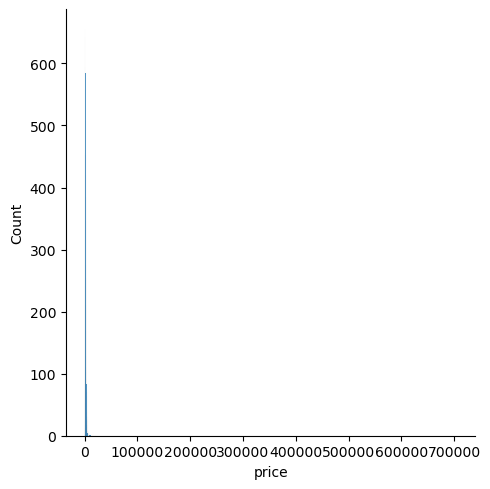

In [65]:
sns.displot(df["price"]);

**Here we can see one tall peak on the left-hand side, and a very long right-tail along the x-axis.**
**While we could try to trim down the `price` values like before, it might be beneficial to try plotting the distribution of `log price` instead:**

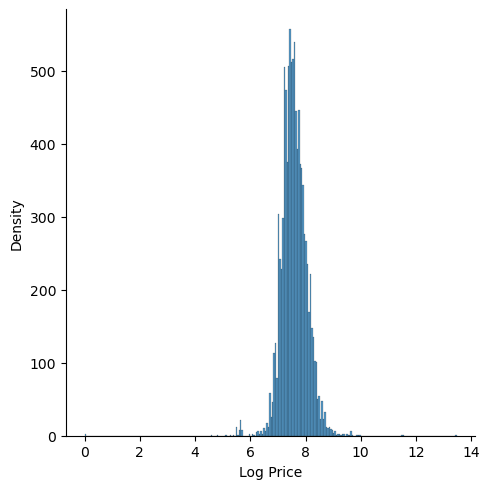

In [72]:
df = df[df["price"] > 0]
log_price = np.log(df["price"])

sns.displot(log_price)
plt.xlabel("Log Price")
plt.ylabel("Density");

**This histogram provides a lot more information than the data in the original form. We can even limit the plot to just be between 5 and 10 to see the distribution more clearly:**

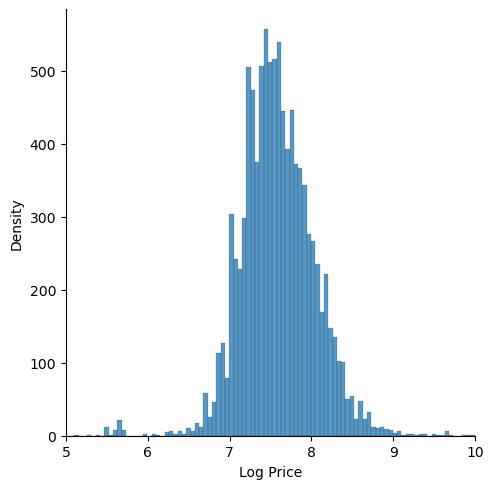

In [73]:
sns.displot(log_price)
plt.xlabel("Log Price")
plt.ylabel("Density")

plt.xlim(5, 10);

**This plot indicates that log price is `unimodal` and approximately normally distributed. This is helpful knowledge if we want to build a model to predict prices in the future.**


---